In [1]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import os
import pickle
from matplotlib import cm
from tqdm import tqdm
import torch
import random
from itertools import product
from itertools import combinations
import collections
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
import torch
import torch.nn as nn
import yaml
from collections import Counter
import math
from matplotlib.patches import Polygon
from scipy.optimize import curve_fit
from utils.topology import NetworkTopology, get_msg_graph
import shutil
import warnings
#from networkx.utils import py_random_state
warnings.filterwarnings('ignore')
import json
from scipy.sparse import coo_matrix
from collections import defaultdict
from math import ceil
import itertools
import torch.nn.functional as F
import copy
from draw import *

In [23]:
test_path = [
#     'GNN_exp/Multitask/multi_level/mpnn_module_1/MpnnGnn_non_meta_001_05-07-40_meta_group_1_hidden_16_num_prop_2_concat_b_lr_0.003_batch__128_1module_meta_copy_1_R/MpnnGnn_non_meta_001_05-09-23_meta_group_1_hidden_16_num_prop_2_concat_b_lr_0.003_batch__128_1module_meta_copy_1_R',
#     'GNN_exp/Multitask/multi_level/mpnn_module_1/MpnnGnn_non_meta_001_05-07-39_meta_group_2_hidden_16_num_prop_2_concat_b_lr_0.003_batch__128_1module_meta_copy_1_R/MpnnGnn_non_meta_001_05-09-07_meta_group_2_hidden_16_num_prop_2_concat_b_lr_0.003_batch__128_1module_meta_copy_1_R',
#     'GNN_exp/Multitask/multi_level/mpnn_module_1/MpnnGnn_non_meta_001_05-07-40_meta_group_3_hidden_16_num_prop_2_concat_b_lr_0.003_batch__128_1module_meta_copy_1_R/MpnnGnn_non_meta_001_05-09-37_meta_group_3_hidden_16_num_prop_2_concat_b_lr_0.003_batch__128_1module_meta_copy_1_R',
#     'GNN_exp/Multitask/multi_level/mpnn_module_1/MpnnGnn_non_meta_001_05-07-40_meta_group_4_hidden_16_num_prop_2_concat_b_lr_0.003_batch__128_1module_meta_copy_1_R/MpnnGnn_non_meta_001_05-09-14_meta_group_4_hidden_16_num_prop_2_concat_b_lr_0.003_batch__128_1module_meta_copy_1_R',
#     'GNN_exp/Multitask/multi_level/mpnn_module_1/MpnnGnn_non_meta_001_05-07-40_meta_group_5_hidden_16_num_prop_2_concat_b_lr_0.003_batch__128_1module_meta_copy_1_R/MpnnGnn_non_meta_001_05-09-19_meta_group_5_hidden_16_num_prop_2_concat_b_lr_0.003_batch__128_1module_meta_copy_1_R',
#     'GNN_exp/Multitask/multi_level/mpnn_module_2_trial_1/MpnnGnn_001_05-08-03_meta_group_1_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_2module_meta_copy_3_R/MpnnGnn_001_05-21-01_meta_group_1_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_2module_meta_copy_3_R',
#     'GNN_exp/Multitask/multi_level/mpnn_module_2_trial_1/MpnnGnn_001_05-08-03_meta_group_2_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_2module_meta_copy_3_R/MpnnGnn_001_05-21-25_meta_group_2_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_2module_meta_copy_3_R',
#     'GNN_exp/Multitask/multi_level/mpnn_module_2_trial_1/MpnnGnn_001_05-08-03_meta_group_3_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_2module_meta_copy_3_R/MpnnGnn_001_05-21-33_meta_group_3_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_2module_meta_copy_3_R',
#     'GNN_exp/Multitask/multi_level/mpnn_module_2_trial_1/MpnnGnn_001_05-08-03_meta_group_4_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_2module_meta_copy_3_R/MpnnGnn_001_05-21-56_meta_group_4_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_2module_meta_copy_3_R',
#     'GNN_exp/Multitask/multi_level/mpnn_module_2_trial_1/MpnnGnn_001_05-15-01_meta_group_5_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_2module_meta_copy_1_R/MpnnGnn_001_05-18-15_meta_group_5_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_2module_meta_copy_1_R',
    # 'GNN_exp/Multitask/multi_level/pna_trial_1/PNAGnn_001_05-07-38_meta_group_1_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_1module_meta_copy_1_B/PNAGnn_001_05-09-09_meta_group_1_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_1module_meta_copy_1_B',
    # 'GNN_exp/Multitask/multi_level/pna_trial_1/PNAGnn_001_05-07-38_meta_group_2_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_1module_meta_copy_1_B/PNAGnn_001_05-09-47_meta_group_2_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_1module_meta_copy_1_B',
    # 'GNN_exp/Multitask/multi_level/pna_trial_1/PNAGnn_001_05-07-38_meta_group_3_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_1module_meta_copy_1_B/PNAGnn_001_05-09-56_meta_group_3_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_1module_meta_copy_1_B',
    # 'GNN_exp/Multitask/multi_level/pna_trial_1/PNAGnn_001_05-07-38_meta_group_4_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_1module_meta_copy_1_B/PNAGnn_001_05-09-38_meta_group_4_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_1module_meta_copy_1_B',
    # 'GNN_exp/Multitask/multi_level/pna_trial_1/PNAGnn_001_05-07-38_meta_group_5_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_1module_meta_copy_1_B/PNAGnn_001_05-09-47_meta_group_5_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_1module_meta_copy_1_B',
    # 'GNN_exp/Multitask/multi_level/pna_trial_1/PNAGnn_001_05-14-58_meta_group_2_4_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_1module_meta_copy_1_B/PNAGnn_001_05-18-07_meta_group_2_4_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_1module_meta_copy_1_B',
    # 'GNN_exp/Multitask/multi_level/pna_trial_1/PNAGnn_001_06-11-14_meta_group_1_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_1module_meta_copy_1_B/PNAGnn_001_06-12-05_meta_group_1_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_1module_meta_copy_1_B',
    # 'GNN_exp/Multitask/multi_level/pna_trial_1/PNAGnn_001_06-11-14_meta_group_2_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_1module_meta_copy_1_B/PNAGnn_001_06-12-14_meta_group_2_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_1module_meta_copy_1_B',
    # 'GNN_exp/Multitask/multi_level/pna_trial_1/PNAGnn_001_06-11-14_meta_group_3_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_1module_meta_copy_1_B/PNAGnn_001_06-12-16_meta_group_3_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_1module_meta_copy_1_B',
    # 'GNN_exp/Multitask/multi_level/pna_trial_1/PNAGnn_001_06-11-14_meta_group_4_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_1module_meta_copy_1_B/PNAGnn_001_06-12-12_meta_group_4_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_1module_meta_copy_1_B',
    # 'GNN_exp/Multitask/multi_level/pna_trial_1/PNAGnn_001_06-11-14_meta_group_5_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_1module_meta_copy_1_B/PNAGnn_001_06-12-10_meta_group_5_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_1module_meta_copy_1_B',
    'GNN_exp/Multitask/multi_level/pna_trial_1/PNAGnn_001_06-11-14_meta_group_2_4_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_1module_meta_copy_1_B/PNAGnn_001_06-12-56_meta_group_2_4_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_1module_meta_copy_1_B',
    'GNN_exp/Multitask/multi_level/pna_trial_1/PNAGnn_001_05-14-58_meta_group_2_4_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_1module_meta_copy_1_B/PNAGnn_001_05-18-07_meta_group_2_4_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_1module_meta_copy_1_B',
    'GNN_exp/Multitask/multi_level/pna_meta/PNAGnn_meta_001_06-12-40_meta_group_2_4_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_2module_meta_copy_1_R/PNAGnn_meta_001_07-07-52_meta_group_2_4_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_2module_meta_copy_1_R',
    'GNN_exp/Multitask/multi_level/mpnn_module_1/MpnnGnn_non_meta_001_05-07-39_meta_group_2_4_hidden_16_num_prop_2_concat_b_lr_0.003_batch__128_1module_meta_copy_1_R/MpnnGnn_non_meta_001_05-10-32_meta_group_2_4_hidden_16_num_prop_2_concat_b_lr_0.003_batch__128_1module_meta_copy_1_R',
    'GNN_exp/Multitask/multi_level/mpnn_module_2_trial_1/MpnnGnn_001_05-15-01_meta_group_2_4_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_2module_meta_copy_1_R/MpnnGnn_001_05-20-46_meta_group_2_4_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_2module_meta_copy_1_R',
    'GNN_exp/Multitask/multi_level/mpnn_module_2_trial_1/MpnnGnn_001_05-08-03_meta_group_2_4_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_2module_meta_copy_3_R/MpnnGnn_001_06-04-31_meta_group_2_4_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_2module_meta_copy_3_R',
   
]

test_path = [
    'GNN_exp/Multitask/multi_level/pna_trial_1/PNAGnn_001_06-11-14_meta_group_1_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_1module_meta_copy_1_B/PNAGnn_001_06-12-05_meta_group_1_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_1module_meta_copy_1_B',
    'GNN_exp/Multitask/multi_level/pna_trial_1/PNAGnn_001_06-11-14_meta_group_2_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_1module_meta_copy_1_B/PNAGnn_001_06-12-14_meta_group_2_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_1module_meta_copy_1_B',
    'GNN_exp/Multitask/multi_level/pna_trial_1/PNAGnn_001_06-11-14_meta_group_3_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_1module_meta_copy_1_B/PNAGnn_001_06-12-16_meta_group_3_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_1module_meta_copy_1_B',
    'GNN_exp/Multitask/multi_level/pna_trial_1/PNAGnn_001_06-11-14_meta_group_4_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_1module_meta_copy_1_B/PNAGnn_001_06-12-12_meta_group_4_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_1module_meta_copy_1_B',
    'GNN_exp/Multitask/multi_level/pna_trial_1/PNAGnn_001_06-11-14_meta_group_5_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_1module_meta_copy_1_B/PNAGnn_001_06-12-10_meta_group_5_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_1module_meta_copy_1_B',
    'GNN_exp/Multitask/multi_level/pna_trial_1/PNAGnn_001_05-07-38_meta_group_1_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_1module_meta_copy_1_B/PNAGnn_001_05-09-09_meta_group_1_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_1module_meta_copy_1_B',
    'GNN_exp/Multitask/multi_level/pna_trial_1/PNAGnn_001_05-07-38_meta_group_2_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_1module_meta_copy_1_B/PNAGnn_001_05-09-47_meta_group_2_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_1module_meta_copy_1_B',
    'GNN_exp/Multitask/multi_level/pna_trial_1/PNAGnn_001_05-07-38_meta_group_3_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_1module_meta_copy_1_B/PNAGnn_001_05-09-56_meta_group_3_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_1module_meta_copy_1_B',
    'GNN_exp/Multitask/multi_level/pna_trial_1/PNAGnn_001_05-07-38_meta_group_4_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_1module_meta_copy_1_B/PNAGnn_001_05-09-38_meta_group_4_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_1module_meta_copy_1_B',
    'GNN_exp/Multitask/multi_level/pna_trial_1/PNAGnn_001_05-07-38_meta_group_5_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_1module_meta_copy_1_B/PNAGnn_001_05-09-47_meta_group_5_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_1module_meta_copy_1_B',
    'GNN_exp/Multitask/multi_level/pna_meta/PNAGnn_meta_001_06-12-40_meta_group_1_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_2module_meta_copy_1_R/PNAGnn_meta_001_07-07-52_meta_group_1_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_2module_meta_copy_1_R',
    'GNN_exp/Multitask/multi_level/pna_meta/PNAGnn_meta_001_06-12-40_meta_group_2_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_2module_meta_copy_1_R/PNAGnn_meta_001_07-07-52_meta_group_2_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_2module_meta_copy_1_R',
    'GNN_exp/Multitask/multi_level/pna_meta/PNAGnn_meta_001_06-12-40_meta_group_3_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_2module_meta_copy_1_R/PNAGnn_meta_001_07-07-52_meta_group_3_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_2module_meta_copy_1_R',
    'GNN_exp/Multitask/multi_level/pna_meta/PNAGnn_meta_001_06-12-40_meta_group_4_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_2module_meta_copy_1_R/PNAGnn_meta_001_07-07-52_meta_group_4_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_2module_meta_copy_1_R',
    'GNN_exp/Multitask/multi_level/pna_meta/PNAGnn_meta_001_06-12-40_meta_group_5_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_2module_meta_copy_1_R/PNAGnn_meta_001_07-07-52_meta_group_5_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_2module_meta_copy_1_R',
    'GNN_exp/Multitask/multi_level/mpnn_module_1/MpnnGnn_non_meta_001_05-07-40_meta_group_1_hidden_16_num_prop_2_concat_b_lr_0.003_batch__128_1module_meta_copy_1_R/MpnnGnn_non_meta_001_05-09-23_meta_group_1_hidden_16_num_prop_2_concat_b_lr_0.003_batch__128_1module_meta_copy_1_R',
    'GNN_exp/Multitask/multi_level/mpnn_module_1/MpnnGnn_non_meta_001_05-07-39_meta_group_2_hidden_16_num_prop_2_concat_b_lr_0.003_batch__128_1module_meta_copy_1_R/MpnnGnn_non_meta_001_05-09-07_meta_group_2_hidden_16_num_prop_2_concat_b_lr_0.003_batch__128_1module_meta_copy_1_R',
    'GNN_exp/Multitask/multi_level/mpnn_module_1/MpnnGnn_non_meta_001_05-07-40_meta_group_3_hidden_16_num_prop_2_concat_b_lr_0.003_batch__128_1module_meta_copy_1_R/MpnnGnn_non_meta_001_05-09-37_meta_group_3_hidden_16_num_prop_2_concat_b_lr_0.003_batch__128_1module_meta_copy_1_R',
    'GNN_exp/Multitask/multi_level/mpnn_module_1/MpnnGnn_non_meta_001_05-07-40_meta_group_4_hidden_16_num_prop_2_concat_b_lr_0.003_batch__128_1module_meta_copy_1_R/MpnnGnn_non_meta_001_05-09-14_meta_group_4_hidden_16_num_prop_2_concat_b_lr_0.003_batch__128_1module_meta_copy_1_R',
    'GNN_exp/Multitask/multi_level/mpnn_module_1/MpnnGnn_non_meta_001_05-07-40_meta_group_5_hidden_16_num_prop_2_concat_b_lr_0.003_batch__128_1module_meta_copy_1_R/MpnnGnn_non_meta_001_05-09-19_meta_group_5_hidden_16_num_prop_2_concat_b_lr_0.003_batch__128_1module_meta_copy_1_R',
    'GNN_exp/Multitask/multi_level/mpnn_module_2_trial_1/MpnnGnn_001_05-08-03_meta_group_1_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_2module_meta_copy_3_R/MpnnGnn_001_05-21-01_meta_group_1_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_2module_meta_copy_3_R',
    'GNN_exp/Multitask/multi_level/mpnn_module_2_trial_1/MpnnGnn_001_05-08-03_meta_group_2_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_2module_meta_copy_3_R/MpnnGnn_001_05-21-25_meta_group_2_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_2module_meta_copy_3_R',
    'GNN_exp/Multitask/multi_level/mpnn_module_2_trial_1/MpnnGnn_001_05-08-03_meta_group_3_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_2module_meta_copy_3_R/MpnnGnn_001_05-21-33_meta_group_3_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_2module_meta_copy_3_R',
    'GNN_exp/Multitask/multi_level/mpnn_module_2_trial_1/MpnnGnn_001_05-08-03_meta_group_4_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_2module_meta_copy_3_R/MpnnGnn_001_05-21-56_meta_group_4_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_2module_meta_copy_3_R',
    'GNN_exp/Multitask/multi_level/mpnn_module_2_trial_1/MpnnGnn_001_05-15-01_meta_group_5_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_2module_meta_copy_1_R/MpnnGnn_001_05-18-15_meta_group_5_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_2module_meta_copy_1_R',
#     'GNN_exp/Multitask/multi_level/pna_meta/PNAGnn_meta_001_06-12-40_meta_group_2_4_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_2module_meta_copy_1_R/PNAGnn_meta_001_07-07-52_meta_group_2_4_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_2module_meta_copy_1_R',
]

test_path = [
    'GNN_exp/Multitask/multi_level/pna_trial_1/PNAGnn_001_06-11-14_meta_group_1_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_1module_meta_copy_1_B/PNAGnn_001_06-12-05_meta_group_1_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_1module_meta_copy_1_B',
    'GNN_exp/Multitask/multi_level/pna_trial_1/PNAGnn_001_06-11-14_meta_group_2_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_1module_meta_copy_1_B/PNAGnn_001_06-12-14_meta_group_2_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_1module_meta_copy_1_B',
    'GNN_exp/Multitask/multi_level/pna_trial_1/PNAGnn_001_06-11-14_meta_group_3_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_1module_meta_copy_1_B/PNAGnn_001_06-12-16_meta_group_3_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_1module_meta_copy_1_B',
    'GNN_exp/Multitask/multi_level/pna_trial_1/PNAGnn_001_06-11-14_meta_group_4_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_1module_meta_copy_1_B/PNAGnn_001_06-12-12_meta_group_4_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_1module_meta_copy_1_B',
    'GNN_exp/Multitask/multi_level/pna_trial_1/PNAGnn_001_06-11-14_meta_group_5_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_1module_meta_copy_1_B/PNAGnn_001_06-12-10_meta_group_5_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_1module_meta_copy_1_B',
    'GNN_exp/Multitask/multi_level/pna_trial_1/PNAGnn_001_06-11-14_meta_group_2_4_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_1module_meta_copy_1_B/PNAGnn_001_06-12-56_meta_group_2_4_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_1module_meta_copy_1_B',
    'GNN_exp/Multitask/multi_level/mpnn_module_1_mean/MpnnGnn_non_meta_001_06-15-15_meta_group_1_hidden_16_num_prop_2_concat_b_lr_0.003_batch__128_1module_meta_copy_1_R/MpnnGnn_non_meta_001_06-16-31_meta_group_1_hidden_16_num_prop_2_concat_b_lr_0.003_batch__128_1module_meta_copy_1_R',
    'GNN_exp/Multitask/multi_level/mpnn_module_1_mean/MpnnGnn_non_meta_001_06-15-15_meta_group_2_hidden_16_num_prop_2_concat_b_lr_0.003_batch__128_1module_meta_copy_1_R/MpnnGnn_non_meta_001_06-16-33_meta_group_2_hidden_16_num_prop_2_concat_b_lr_0.003_batch__128_1module_meta_copy_1_R',
    'GNN_exp/Multitask/multi_level/mpnn_module_1_mean/MpnnGnn_non_meta_001_06-15-15_meta_group_3_hidden_16_num_prop_2_concat_b_lr_0.003_batch__128_1module_meta_copy_1_R/MpnnGnn_non_meta_001_06-16-37_meta_group_3_hidden_16_num_prop_2_concat_b_lr_0.003_batch__128_1module_meta_copy_1_R',
    'GNN_exp/Multitask/multi_level/mpnn_module_1_mean/MpnnGnn_non_meta_001_06-15-15_meta_group_4_hidden_16_num_prop_2_concat_b_lr_0.003_batch__128_1module_meta_copy_1_R/MpnnGnn_non_meta_001_06-16-37_meta_group_4_hidden_16_num_prop_2_concat_b_lr_0.003_batch__128_1module_meta_copy_1_R',
    'GNN_exp/Multitask/multi_level/mpnn_module_1_mean/MpnnGnn_non_meta_001_06-15-15_meta_group_5_hidden_16_num_prop_2_concat_b_lr_0.003_batch__128_1module_meta_copy_1_R/MpnnGnn_non_meta_001_06-16-37_meta_group_5_hidden_16_num_prop_2_concat_b_lr_0.003_batch__128_1module_meta_copy_1_R',
    'GNN_exp/Multitask/multi_level/mpnn_module_1_mean/MpnnGnn_non_meta_001_06-15-15_meta_group_2_4_hidden_16_num_prop_2_concat_b_lr_0.003_batch__128_1module_meta_copy_1_R/MpnnGnn_non_meta_001_06-17-24_meta_group_2_4_hidden_16_num_prop_2_concat_b_lr_0.003_batch__128_1module_meta_copy_1_R',
    'GNN_exp/Multitask/multi_level/mpnn_module_1_min/MpnnGnn_non_meta_001_06-15-20_meta_group_1_hidden_16_num_prop_2_concat_b_lr_0.003_batch__128_1module_meta_copy_1_R/MpnnGnn_non_meta_001_06-16-33_meta_group_1_hidden_16_num_prop_2_concat_b_lr_0.003_batch__128_1module_meta_copy_1_R',
    'GNN_exp/Multitask/multi_level/mpnn_module_1_min/MpnnGnn_non_meta_001_06-15-20_meta_group_2_hidden_16_num_prop_2_concat_b_lr_0.003_batch__128_1module_meta_copy_1_R/MpnnGnn_non_meta_001_06-16-34_meta_group_2_hidden_16_num_prop_2_concat_b_lr_0.003_batch__128_1module_meta_copy_1_R',
    'GNN_exp/Multitask/multi_level/mpnn_module_1_min/MpnnGnn_non_meta_001_06-15-20_meta_group_3_hidden_16_num_prop_2_concat_b_lr_0.003_batch__128_1module_meta_copy_1_R/MpnnGnn_non_meta_001_06-16-40_meta_group_3_hidden_16_num_prop_2_concat_b_lr_0.003_batch__128_1module_meta_copy_1_R',
    'GNN_exp/Multitask/multi_level/mpnn_module_1_min/MpnnGnn_non_meta_001_06-15-20_meta_group_4_hidden_16_num_prop_2_concat_b_lr_0.003_batch__128_1module_meta_copy_1_R/MpnnGnn_non_meta_001_06-16-40_meta_group_4_hidden_16_num_prop_2_concat_b_lr_0.003_batch__128_1module_meta_copy_1_R',
    'GNN_exp/Multitask/multi_level/mpnn_module_1_min/MpnnGnn_non_meta_001_06-15-20_meta_group_5_hidden_16_num_prop_2_concat_b_lr_0.003_batch__128_1module_meta_copy_1_R/MpnnGnn_non_meta_001_06-16-38_meta_group_5_hidden_16_num_prop_2_concat_b_lr_0.003_batch__128_1module_meta_copy_1_R',
    'GNN_exp/Multitask/multi_level/mpnn_module_1_min/MpnnGnn_non_meta_001_06-15-20_meta_group_2_4_hidden_16_num_prop_2_concat_b_lr_0.003_batch__128_1module_meta_copy_1_R/MpnnGnn_non_meta_001_06-17-25_meta_group_2_4_hidden_16_num_prop_2_concat_b_lr_0.003_batch__128_1module_meta_copy_1_R',
    'GNN_exp/Multitask/multi_level/mpnn_module_1/MpnnGnn_non_meta_001_05-07-40_meta_group_1_hidden_16_num_prop_2_concat_b_lr_0.003_batch__128_1module_meta_copy_1_R/MpnnGnn_non_meta_001_05-09-23_meta_group_1_hidden_16_num_prop_2_concat_b_lr_0.003_batch__128_1module_meta_copy_1_R',
    'GNN_exp/Multitask/multi_level/mpnn_module_1/MpnnGnn_non_meta_001_05-07-39_meta_group_2_hidden_16_num_prop_2_concat_b_lr_0.003_batch__128_1module_meta_copy_1_R/MpnnGnn_non_meta_001_05-09-07_meta_group_2_hidden_16_num_prop_2_concat_b_lr_0.003_batch__128_1module_meta_copy_1_R',
    'GNN_exp/Multitask/multi_level/mpnn_module_1/MpnnGnn_non_meta_001_05-07-40_meta_group_3_hidden_16_num_prop_2_concat_b_lr_0.003_batch__128_1module_meta_copy_1_R/MpnnGnn_non_meta_001_05-09-37_meta_group_3_hidden_16_num_prop_2_concat_b_lr_0.003_batch__128_1module_meta_copy_1_R',
    'GNN_exp/Multitask/multi_level/mpnn_module_1/MpnnGnn_non_meta_001_05-07-40_meta_group_4_hidden_16_num_prop_2_concat_b_lr_0.003_batch__128_1module_meta_copy_1_R/MpnnGnn_non_meta_001_05-09-14_meta_group_4_hidden_16_num_prop_2_concat_b_lr_0.003_batch__128_1module_meta_copy_1_R',
    'GNN_exp/Multitask/multi_level/mpnn_module_1/MpnnGnn_non_meta_001_05-07-40_meta_group_5_hidden_16_num_prop_2_concat_b_lr_0.003_batch__128_1module_meta_copy_1_R/MpnnGnn_non_meta_001_05-09-19_meta_group_5_hidden_16_num_prop_2_concat_b_lr_0.003_batch__128_1module_meta_copy_1_R',
    'GNN_exp/Multitask/multi_level/mpnn_module_1/MpnnGnn_non_meta_001_05-07-39_meta_group_2_4_hidden_16_num_prop_2_concat_b_lr_0.003_batch__128_1module_meta_copy_1_R/MpnnGnn_non_meta_001_05-10-32_meta_group_2_4_hidden_16_num_prop_2_concat_b_lr_0.003_batch__128_1module_meta_copy_1_R',
]

test_path = [
    'GNN_exp/Multitask/multi_level/mpnn_module_2_trial_2/MpnnGnn_001_10-15-50_meta_group_1_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_2module_meta_copy_1_R/MpnnGnn_001_11-00-15_meta_group_1_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_2module_meta_copy_1_R',
    'GNN_exp/Multitask/multi_level/mpnn_module_2_trial_2/MpnnGnn_001_10-15-50_meta_group_2_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_2module_meta_copy_1_R/MpnnGnn_001_11-00-07_meta_group_2_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_2module_meta_copy_1_R',
    'GNN_exp/Multitask/multi_level/mpnn_module_2_trial_2/MpnnGnn_001_10-15-50_meta_group_3_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_2module_meta_copy_1_R/MpnnGnn_001_11-00-28_meta_group_3_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_2module_meta_copy_1_R',
    'GNN_exp/Multitask/multi_level/mpnn_module_2_trial_2/MpnnGnn_001_10-15-50_meta_group_4_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_2module_meta_copy_1_R/MpnnGnn_001_11-00-55_meta_group_4_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_2module_meta_copy_1_R',
    'GNN_exp/Multitask/multi_level/mpnn_module_2_trial_2/MpnnGnn_001_10-15-50_meta_group_5_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_2module_meta_copy_1_R/MpnnGnn_001_11-01-04_meta_group_5_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_2module_meta_copy_1_R',
    'GNN_exp/Multitask/multi_level/mpnn_module_2_trial_2/MpnnGnn_001_10-15-50_meta_group_2_4_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_2module_meta_copy_1_R/MpnnGnn_001_11-08-58_meta_group_2_4_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_2module_meta_copy_1_R',
#     '',
    'GNN_exp/Multitask/multi_level/pna_trial_1/PNAGnn_001_06-11-14_meta_group_1_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_1module_meta_copy_1_B/PNAGnn_001_06-12-05_meta_group_1_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_1module_meta_copy_1_B',
    'GNN_exp/Multitask/multi_level/pna_trial_1/PNAGnn_001_06-11-14_meta_group_2_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_1module_meta_copy_1_B/PNAGnn_001_06-12-14_meta_group_2_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_1module_meta_copy_1_B',
    'GNN_exp/Multitask/multi_level/pna_trial_1/PNAGnn_001_06-11-14_meta_group_3_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_1module_meta_copy_1_B/PNAGnn_001_06-12-16_meta_group_3_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_1module_meta_copy_1_B',
    'GNN_exp/Multitask/multi_level/pna_trial_1/PNAGnn_001_06-11-14_meta_group_4_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_1module_meta_copy_1_B/PNAGnn_001_06-12-12_meta_group_4_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_1module_meta_copy_1_B',
    'GNN_exp/Multitask/multi_level/pna_trial_1/PNAGnn_001_06-11-14_meta_group_5_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_1module_meta_copy_1_B/PNAGnn_001_06-12-10_meta_group_5_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_1module_meta_copy_1_B',
    'GNN_exp/Multitask/multi_level/pna_trial_1/PNAGnn_001_06-11-14_meta_group_2_4_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_1module_meta_copy_1_B/PNAGnn_001_06-12-56_meta_group_2_4_hidden_16_num_prop_2_not_concat_b_lr_0.003_batch__128_1module_meta_copy_1_B'
]

In [24]:
norm = False
import matplotlib as mpl
############################
###   FIGURE PARAMETER   ###
############################
EPS = float(np.finfo(np.float64).eps)
f = plt.figure(figsize=(60, 85), dpi=266)
cmap = plt.cm.bwr
lower = plt.cm.seismic(np.linspace(0, 0.5, 30))
white = plt.cm.seismic(np.ones(5) * 0.5)
upper = plt.cm.seismic(np.linspace(0.5, 1, 10))
colors = np.vstack((lower, upper))
tmap = matplotlib.colors.LinearSegmentedColormap.from_list('terrain_map_white', colors)

X_low100 = np.array(pickle.load(open("data_temp/WL_flex_graphs_100_shell_pca_sub_50.p", "rb"))['X_low'])
data100 = np.array(pickle.load(open("data_temp/WL_flex_graphs_100_shell_pca_sub_50.p", "rb"))['prop_list'])
name_list100 = np.array(pickle.load(open("data_temp/WL_flex_graphs_100_shell_pca_sub_50.p", "rb"))['name_list'])

num_share = len(test_path)
number_of_model_plot = 6



<Figure size 15960x22610 with 0 Axes>

outer: 12it [00:00, 475.21it/s]                      
outer: 0it [00:00, ?it/s]

[[-4.94286013 -0.2854265 ]]
[[-4.85565758 -0.29411304]]


outer: 12it [00:00, 16.12it/s]


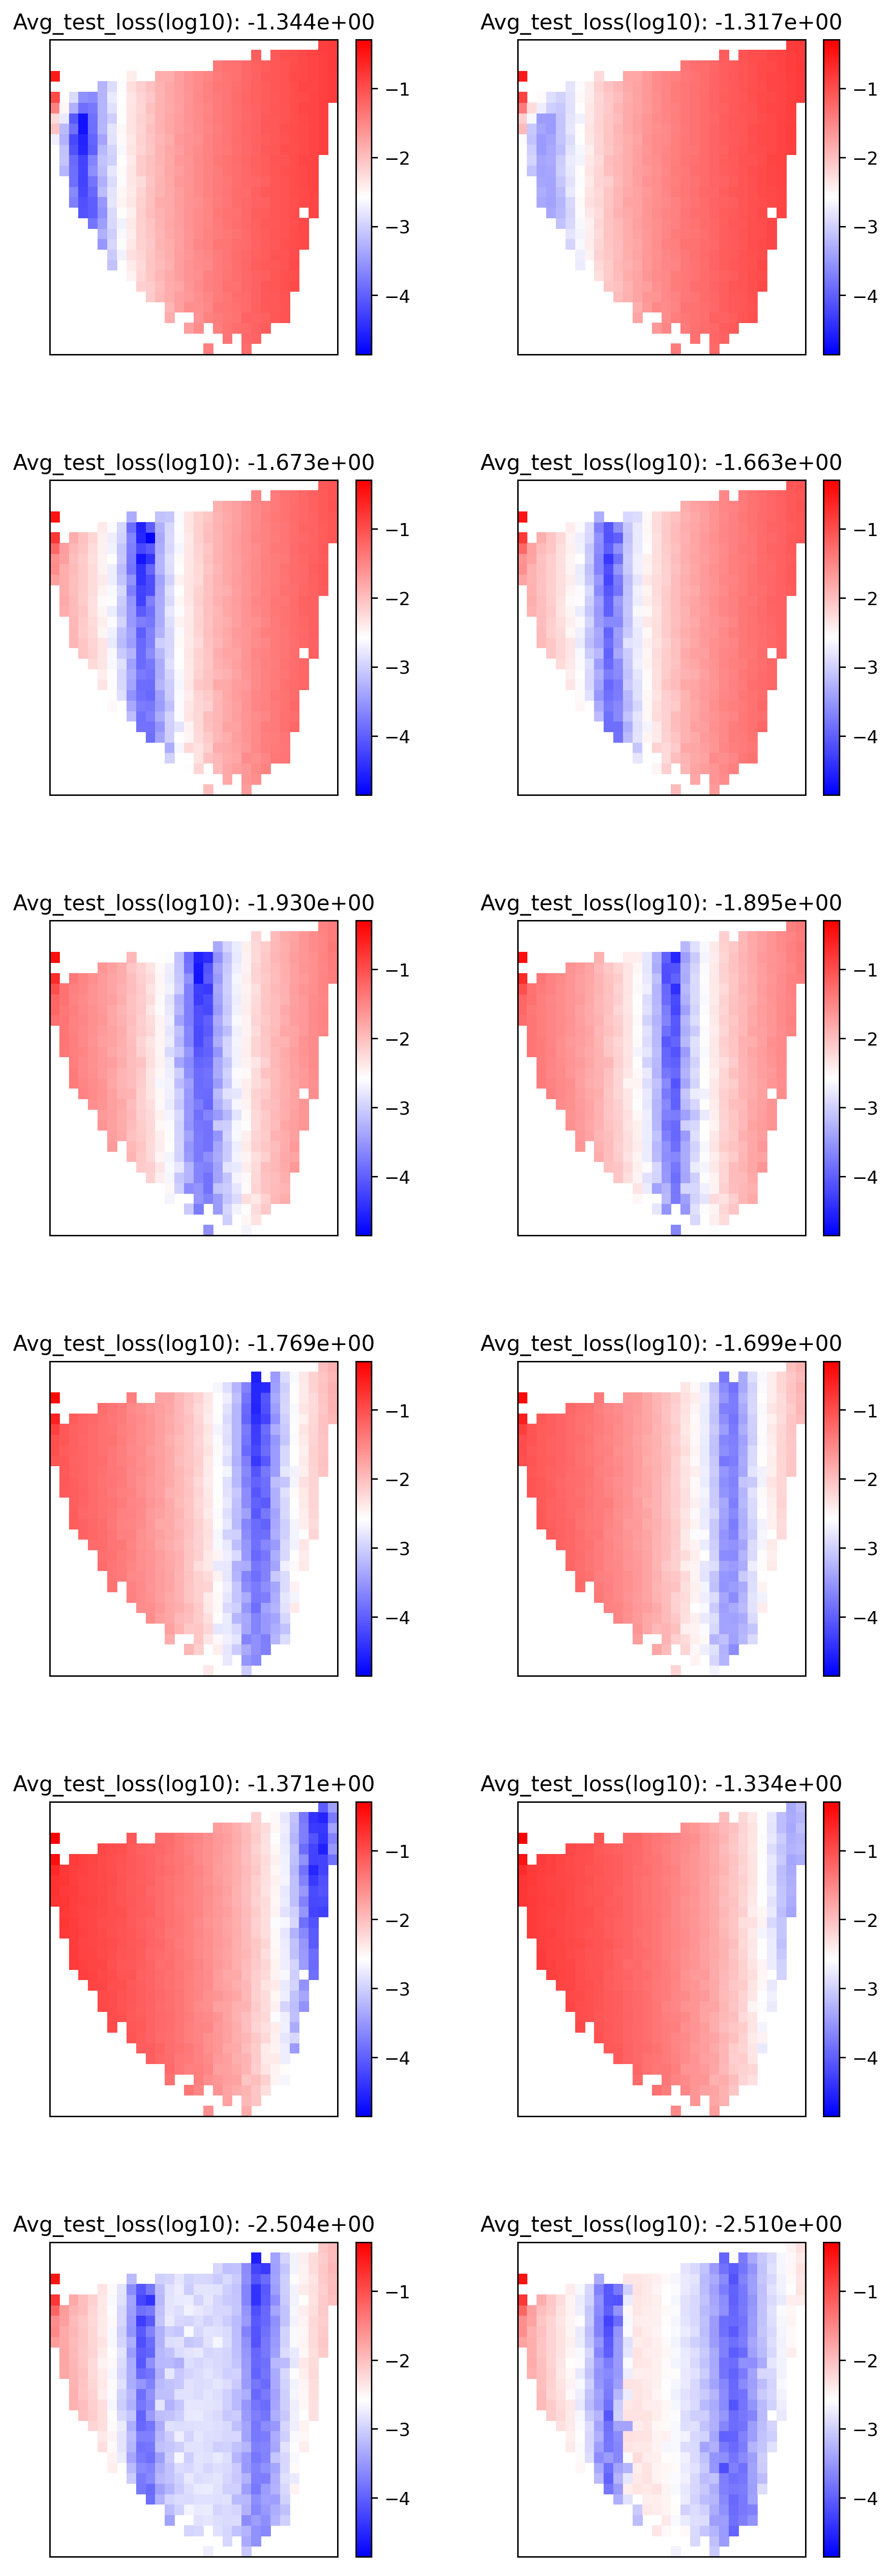

In [25]:
Cal_XYL(test_path, graph_only=False)
minmax1, minmax2 = Cal_column_range(test_path, num_share)
color(test_path, minmax1, minmax2, num_share, number_of_model_plot, f)
# draw_trainval_curve(test_path, minmax1, minmax2, num_share, number_of_model_plot, f)
# draw_best_degree_histo(test_path, minmax1, minmax2, num_share, number_of_model_plot, f, norm)
# draw_train_module(test_path, number_of_model_plot, f, norm)
# draw_test_deg_module_reject(test_path, minmax1, minmax2, num_share, number_of_model_plot, f, norm)
# draw_test_deg_module(test_path, minmax1, minmax2, num_share, number_of_model_plot, f, norm)
f.subplots_adjust(hspace=0.4, wspace=0.3)
f

In [ ]:
f.savefig('module1_without_lr_scheduler.pdf', bbox_inches='tight')

In [ ]:
f1 = plt.figure(figsize=(15, 6), dpi=300)
color2(test_path,minmax1, minmax2, num_share, number_of_model_plot, f1)

In [ ]:
for x, _ in tqdm(enumerate(test_path), desc="outer"):
        test_config = yaml.load(open(os.path.join(_, 'config.yaml'), 'r'), Loader=yaml.FullLoader)
        split = test_config['dataset']['split']
        name = pickle.load(open(os.path.join(_, "name.p"), "rb"))

        try:
            p_n = pd.read_csv(os.path.join(_, "gt_pts_n{}.csv".format(split)), sep='\t', header=None).values
            q_n = pd.read_csv(os.path.join(_, "pred_pts_n{}.csv".format(split)), sep='\t', header=None).values
            p_g = pd.read_csv(os.path.join(_, "gt_pts_g{}.csv".format(split)), sep='\t', header=None).values
            q_g = pd.read_csv(os.path.join(_, "pred_pts_g{}.csv".format(split)), sep='\t', header=None).values
        except:
            p_n = pd.read_csv(os.path.join(_, "gt_pts_n{}.csv".format(split)), sep='\t', header=None).values
            q_n = pd.read_csv(os.path.join(_, "pred_pts_n{}.csv".format(split)), sep='\t', header=None).values
            p_g = pd.read_csv(os.path.join(_, "gt_pts_g{}.csv".format(split)), sep='\t', header=None).values
            q_g = pd.read_csv(os.path.join(_, "pred_pts_g{}.csv".format(split)), sep='\t', header=None).values

        loss_func = nn.MSELoss(reduction='mean')
        P_n_0 = torch.tensor(p_n[:, 0])
        Q_n_0 = torch.tensor(q_n[:, 0]) 
        Q_n_1 = torch.tensor(q_n[:, 1])
        P_n_1 = torch.tensor(p_n[:, 1])
        Q_n_2 = torch.tensor(q_n[:, 2])
        P_n_2 = torch.tensor(p_n[:, 2])
        print(loss_func(Q_n_0, P_n_0))
        print(loss_func(Q_n_1, P_n_1))
        print(loss_func(Q_n_2, P_n_2))

        P_g_0 = torch.tensor(p_g[:, 0])
        Q_g_0 = torch.tensor(q_g[:, 0]) 
        Q_g_1 = torch.tensor(q_g[:, 1])
        P_g_1 = torch.tensor(p_g[:, 1])
        Q_g_2 = torch.tensor(q_g[:, 2])
        P_g_2 = torch.tensor(p_g[:, 2])
        print(loss_func(Q_g_0, P_g_0))
        print(loss_func(Q_g_1, P_g_1))
        print(loss_func(Q_g_2, P_g_2))
